In [1]:
import pandas as pd
import os
import ast
from collections import Counter
import seaborn as sns
import ast
import numpy as np
import matplotlib.pyplot as plt

### 1. Concat and remove duplicate labels in every boxes column

#### 1.1 Related functions for data preprocessing

In [6]:
# Define the file paths corresponding to each dynasty
dynasty_files = {
    "liaojin": [
        "output_liaojin.csv",
        "output_liaojin_museum.csv"
    ],
    "suitang": [
        "output_suitang.csv",
        "output_suitang_museum.csv"
    ],
    "song": [
        "book_song.csv",
        "museum_song1.csv"
    ],
    "ming": [
        "book_ming.csv",
        "museum_ming1.csv"
    ],
    "yuan": [
        "book_yuan.csv",
        "museum_yuan1.csv"
    ],
    "qing": [
        "book_qing.csv",
        "museum_qing1.csv"
    ]
}

# ========== core function ==========

def load_and_combine_files(dynasty_files):
    combined_dfs = []
    for dynasty, file_list in dynasty_files.items():
        for file_path in file_list:
            try:
                df = pd.read_csv(file_path)
                print(f"‚úÖ Read success: {file_path}, rows: {len( df )}")
                if 'label' in df.columns and 'labels' not in df.columns:
                    df.rename(columns={'label': 'labels'}, inplace=True)
                elif 'labels' not in df.columns:
                    df['labels'] = None
                df['labels'] = df['labels'].astype(str)
                df['source_file'] = os.path.basename(file_path)
                df['dynasty'] = dynasty
                combined_dfs.append(df)
            except Exception as e:
                print(f"‚ùå Read failed: {file_path}, error: {e}")
    if not combined_dfs:
        raise ValueError("‚ùóNo files were loaded successfully, check the path and file contents!")
    return pd.concat(combined_dfs, ignore_index=True)

# Forced unification of boxes columns: all saved as strings, since the previous display detected 172 rows of boxes that were not strings
def ensure_boxes_str(value):
    if isinstance(value, str):
        return value
    elif isinstance(value, list):
        return str(value)
    else:
        return '[]'  # Empty or exceptions directly with an empty list

def extract_box_labels_unique(boxes_input):
    try:
        if isinstance(boxes_input, str):
            boxes_list = ast.literal_eval(boxes_input)
        elif isinstance(boxes_input, list):
            boxes_list = boxes_input
        else:
            return []
        unique_labels = list({box['label'] for box in boxes_list})
        return [{'label': label} for label in unique_labels]
    except Exception:
        return []

def extract_box_labels(boxes_input):
    try:
        if isinstance(boxes_input, str):
            boxes_list = ast.literal_eval(boxes_input)
        elif isinstance(boxes_input, list):
            boxes_list = boxes_input
        else:
            return []
        return [box['label'] for box in boxes_list]
    except Exception:
        return []

def extract_label_numbers(label_list):
    if isinstance(label_list, list):
        return label_list
    try:
        parsed = ast.literal_eval(label_list)
        if isinstance(parsed, list):
            return parsed
    except Exception:
        return []
    return []

def count_boxes(df):
    all_labels = []
    for item in df['boxes']:
        all_labels.extend(extract_box_labels(item))
    return Counter(all_labels)

def count_labels(df):
    all_numbers = []
    for item in df['labels']:
        all_numbers.extend(extract_label_numbers(item))
    return Counter(all_numbers)
    

#### 1.2 Main process for getting our dataframe 

In [7]:
#Load data
all_combined = load_and_combine_files(dynasty_files)

all_combined['boxes'] = all_combined['boxes'].apply(ensure_boxes_str)

# Detect boxes column exception
invalid_boxes = all_combined[~all_combined['boxes'].apply(lambda x: isinstance(x, str))]
print(f"Detected {len( invalid_boxes )} row boxes non-string")

#Duplicate labels in boxes
all_combined['boxes'] = all_combined['boxes'].apply(extract_box_labels_unique)

all_combined.dtypes

‚úÖ Read success: output_liaojin.csv, rows: 62
‚úÖ Read success: output_liaojin_museum.csv, rows: 55
‚úÖ Read success: output_suitang.csv, rows: 77
‚úÖ Read success: output_suitang_museum.csv, rows: 90
‚úÖ Read success: book_song.csv, rows: 84
‚úÖ Read success: museum_song1.csv, rows: 47
‚úÖ Read success: book_ming.csv, rows: 122
‚úÖ Read success: museum_ming1.csv, rows: 75
‚úÖ Read success: book_yuan.csv, rows: 87
‚úÖ Read success: museum_yuan1.csv, rows: 58
‚úÖ Read success: book_qing.csv, rows: 182
‚úÖ Read success: museum_qing1.csv, rows: 314
Detected 0 row boxes non-string


ID             object
boxes          object
labels         object
source_file    object
dynasty        object
dtype: object

### 2. Statistical and data analysis and visualization
#### 2.1 Counting for boxes and labels

In [9]:
# Statistics by dynasty
boxes_stats = {}
labels_stats = {}

for dynasty, group_df in all_combined.groupby('dynasty'):
    boxes_stats[dynasty] = count_boxes(group_df)
    labels_stats[dynasty] = count_labels(group_df)

# Overall statistics
boxes_stats['all'] = count_boxes(all_combined)
labels_stats['all'] = count_labels(all_combined)

# Convert to DataFrame
boxes_df = pd.DataFrame(boxes_stats).fillna(0).astype(int)
labels_df = pd.DataFrame(labels_stats).fillna(0).astype(int)

# #Save statistics
# boxes_df.to_csv("boxes_label_frequency_by_dynasty.csv")
# labels_df.to_csv("labels_number_distribution_by_dynasty.csv")

In [10]:
boxes_df

liaojin  ming  qing  song  suitang  yuan  all
figure                           3     0     1     0        1     0    5
mountain tree                    1     0     0     0        0     0    1
deer                            15     0     1     1        3     1   21
ÁøüÈ∏ü                               2     0     0     0        0     1    3
plant                            1     2     1     0        1     0    5
...                            ...   ...   ...   ...      ...   ...  ...
Èáë‰πåÈ∏ü                              0     0     0     0        0     1    1
Repeating Abstract Motifs        0     0     0     0        0     1    1
È∫íÈ∫üÁ∫π                              0     0     0     0        0     1    1
ÊñπÊê≠Á∫π                              0     0     0     0        0     1    1
Honeycomb                        0     0     0     0        0     1    1

[988 rows x 7 columns]

In [11]:
labels_df 

liaojin  ming  qing  song  suitang  yuan   all
5          19    39   240    20       39    27   384
0         201   165  1014    74      268   314  2036
1         199   639  2655   498      395   666  5052
3          58   117   343    13      172   149   852
2          63   504  1272    73       54   100  2066
4           2    51   151    43       79    18   344
None        0    30     0     0        0    58    88
0: 5        0     0     1     0        0     0     1
1: 5        0     0     1     0        0     0     1
2: 0        0     0     1     0        0     0     1
3: 5        0     0     1     0        0     0     1
4: 5        0     0     1     0        0     0     1
5: 2        0     0     1     0        0     0     1
6: 2        0     0     1     0        0     0     1
7: 0        0     0     1     0        0     0     1
-1          0     0    11     0        0     0    11
9           0     0     0   143        0     0   143
6           0     0     0     0        1     0     1

#### 2.2 Initial visualization to identify problems

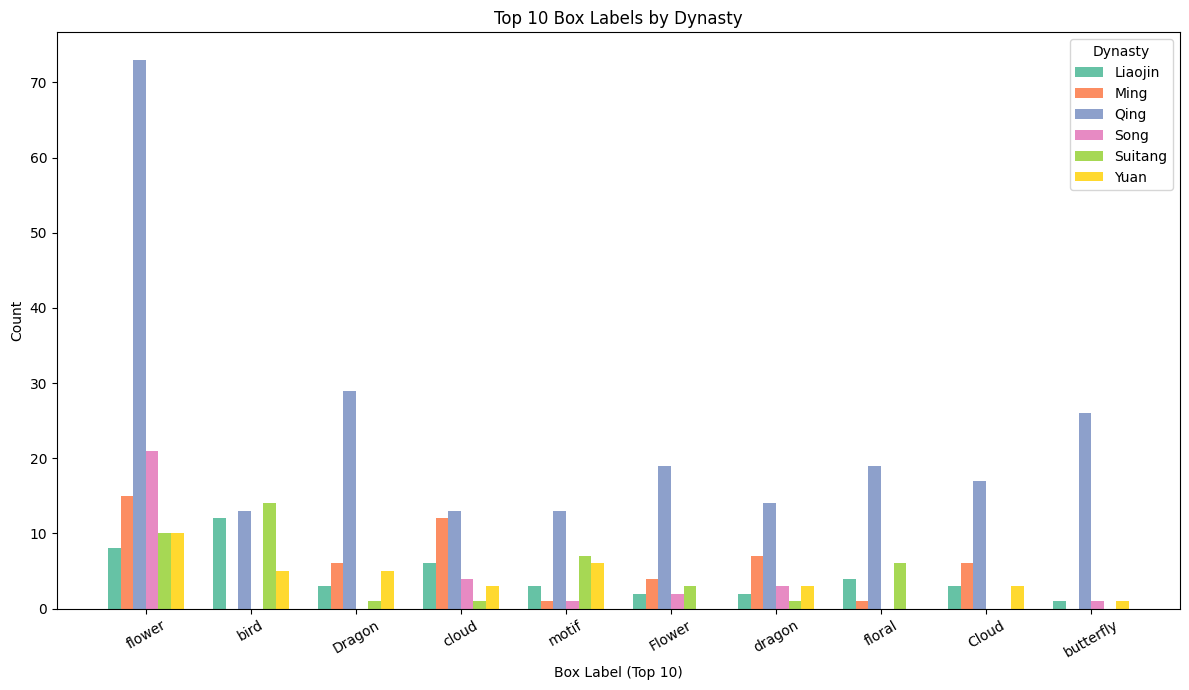

In [12]:
top_labels = boxes_df['all'].sort_values(ascending=False).head(10).index.tolist()
dynasties = [col for col in boxes_df.columns if col != 'all']
filtered_boxes_df = boxes_df.loc[top_labels, dynasties]

# Advanced colour matching with seaborn
colors = sns.color_palette("Set2", n_colors=len(dynasties))

# plot
x = np.arange(len(top_labels))
width = 0.12

plt.figure(figsize=(12, 7))
for i, dynasty in enumerate(dynasties):
    plt.bar(x + i * width, filtered_boxes_df[dynasty], width,
            label=dynasty.capitalize(), color=colors[i % len(colors)])

plt.xlabel('Box Label (Top 10)')
plt.ylabel('Count')
plt.title('Top 10 Box Labels by Dynasty')
plt.xticks(x + width * (len(dynasties) - 1) / 2, top_labels, rotation=30)
plt.legend(title='Dynasty')
plt.tight_layout()
plt.show()


Visualisation of boxes is now meaningless:
1. case is not standardised
2. There are many meaningless labels
3. Chinese labels are not translated

In [13]:
# Make sure the index is a string
labels_df.index = labels_df.index.astype(str)

# Defining replacement mappings
category_map = {
    '0': "animals",
    '1': "plants",
    '2': "inanimate objects",
    '3': "geometric patterns",
    '4': "textual motifs",
    '5': "human motifs",
    'None': "Uncategorized"
}

#Extracting the dynasties column
if 'all' in labels_df.columns:
    dynasties = [col for col in labels_df.columns if col != 'all']
else:
    dynasties = list(labels_df.columns)

# Filtering and renaming indexes
filtered_labels_df = labels_df.loc[labels_df.index.isin(category_map.keys())].copy()
filtered_labels_df = filtered_labels_df.rename(index=category_map)
percent_df = filtered_labels_df[dynasties].div(filtered_labels_df[dynasties].sum(axis=0), axis=1)

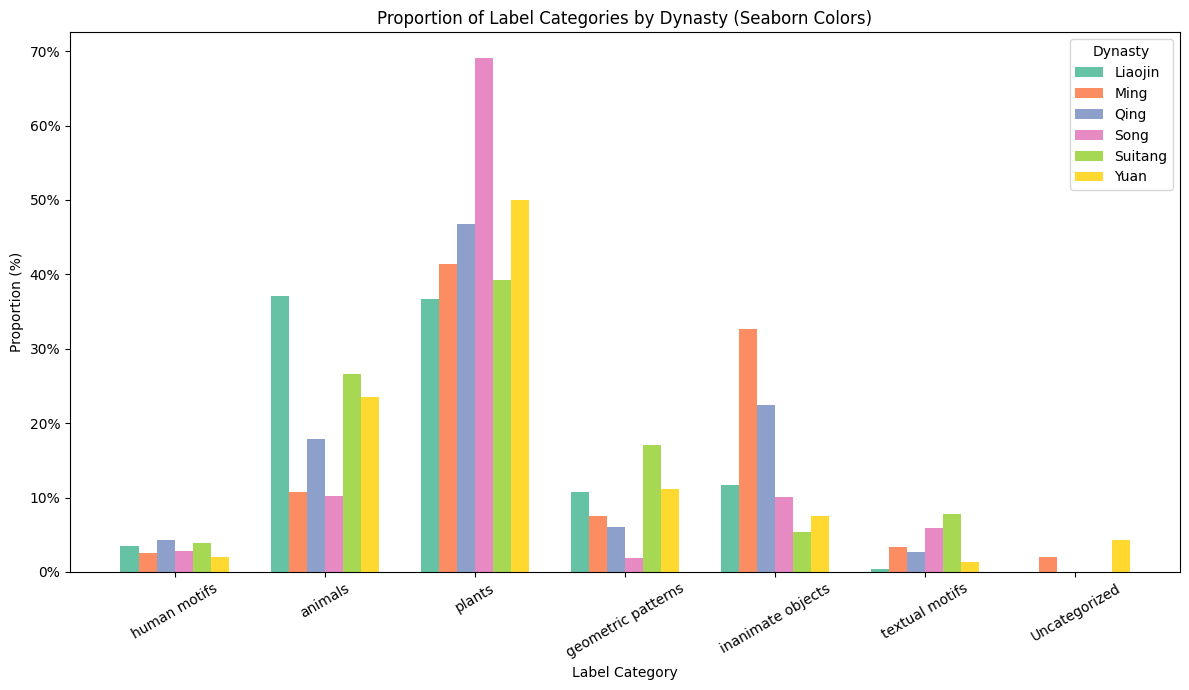

In [14]:
# seaborn 
colors = sns.color_palette("Set2", n_colors=len(dynasties))

categories = filtered_labels_df.index.tolist()
x = np.arange(len(categories))
width = 0.12

plt.figure(figsize=(12, 7))
for i, dynasty in enumerate(dynasties):
    plt.bar(x + i * width, percent_df[dynasty], width, label=dynasty.capitalize(), color=colors[i % len(colors)])

plt.xlabel('Label Category')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Label Categories by Dynasty (Seaborn Colors)')
plt.xticks(x + width * (len(dynasties) - 1) / 2, categories, rotation=30)
plt.legend(title='Dynasty')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.tight_layout()
plt.show()

### 3. Converting boxes' label names to English and Cleaning the content

#### 3.1 View the original unique boxes labels to locate the problem

In [15]:
all_box_labels = []

for b in all_combined['boxes']:
    try:
        # If it's a string, parse it into a list; if it's a list, parse it directly with the
        if isinstance(b, str):
            boxes_list = ast.literal_eval(b)
        elif isinstance(b, list):
            boxes_list = b
        else:
            continue
        
        # Extract label, convert to lowercase
        all_box_labels.extend([str(box['label']).lower() for box in boxes_list if 'label' in box])
    except Exception:
        continue

# Convert to DataFrame
box_labels_df = pd.DataFrame({'normalized_label': all_box_labels})

# Counting unique labels and frequency
unique_labels_df = box_labels_df['normalized_label'].value_counts().reset_index()
unique_labels_df.columns = ['box_label', 'count']

# Save to CSV
unique_labels_df.to_csv("unique_box_labels_lowercased.csv", index=False)
print("‚úÖA unique_box_labels_lowercased.csv has been generated for checking all box labels.")

‚úÖA unique_box_labels_lowercased.csv has been generated for checking all box labels.


#### 3.2 Define the conversion map

In [16]:
# Define translation mappings (extended version, including proprietary words such as flap areole)
translation_map = {
    '‰∫ë': 'cloud',
    'Ëä±': 'flower',
    'Áâ°‰∏π': 'peony',
    'Ëù¥Ëù∂': 'butterfly',
    'Èπ§': 'crane',
    'Âá§Âá∞': 'phoenix',
    'Èæô': 'dragon',
    'Âá§': 'phoenix',
    'Â±±': 'mountain',
    'Ê∞¥Ê≥¢': 'wave',
    '‰∫∫Áâ©': 'figure',
    'È∏ü': 'bird',
    'Ê¢Ö': 'plum blossom',
    'Á´π': 'bamboo',
    'È±º': 'fish',
    'Èπø': 'beast',
    'Ëôé': 'tiger',
    'ÁãÆ': 'lion',
    'Ëé≤': 'lotus',
    'Ëé≤Ëä±': 'lotus',
    'ËèäËä±':'chrysanthemum',
    'Áì£Á™†': 'petal cluster',
    'Áì£Á™†Á∫π': 'petal cluster',
    'Áì£Á™†Âºè': 'petal cluster',
    'ËäôËìâ': 'hibiscus',
    'Âõ¢Á∫π': 'medallion',
    'ÂçöÂè§': 'antiquities',
    # 'ÂçöÂè§Á∫π': 'antiquities',
    'Ëµ§ÂÖî': 'red hare',
    'Á¶è': 'fu',
    'Áõ¥Á∫ø': 'straight line',
    'Ëë°ËêÑ': 'grape',
    'ÈîØÈΩøÁêÉÂΩ¢': 'serrated sphere',
    'Âá§Â∞æ': 'phoenix tail',
    'Ëü†Ëû≠Á∫π': 'coiled dragon',
    'ÊñπËÉú': 'square victory',
    'È£ûÁáï': 'flying swallow',
    'ÂØπÈ©¨Á∫π': 'paired horse',
    '‰ªïÂ•≥': 'court lady',
    '‰ΩõÊâã': "Buddha's hand",
    'Ëê±ËçâÁ∫π': 'daylily',
    'Á´•Â≠êÈ™ëÁæä': 'child riding goat',
    'Èî¶È∏°': 'golden pheasant',
    'ÈáëÈî≠': 'gold ingot',
    'Á´•Â≠ê': 'child motif',
    'ÁâõÂΩ¢Âä®Áâ©Á∫πÊ†∑': 'ox-shaped animal',
    'Â§πÁº¨': 'resist-dyed',
    'Â©¥ÊàèÂõæ': 'baby play scene',
    'Â¶ÇÊÑèÂêâÁ••Á∫π': 'ruyi auspicious',
    'Áº†ÊûùÂè∂': 'intertwined branch and leaf',
    'ÊñóÁâõÁ∫π': 'bullfighting',
    'ÊüøËíÇÁ™†': 'persimmon calyx',
    'Â©¥Êàè': 'baby play',
    '‰∏áÂ≠ó': 'swastika',
    'Áü≥Ê¶¥': 'pomegranate',
    'ÂØπÊ°É': 'paired peach',
    'Â•îÂÖΩ': 'beast',
    'Âá§Á∫π': 'phoenix',
    'Êµ∑Ê£†': 'begonia',
    'ËùôËù†': 'bat',
    'ÁêêÁ∫π': 'small linked',
    'ÁõòÈïø': 'endless knot',
    'ÁõòÂá§': 'coiled phoenix',
    'Êµ∑Ê∞¥Á∫πÊ†∑': 'sea wave',
    'ÁêÉË∑ØÊµÅËãèÁ∫π': 'ball-and-tassel',
    'ÁøüÁ∫π': 'pheasant',
    'ÊØ¨Ë∑Ø': 'ball',
    'ÁÅµËäù': 'lingzhi',
    'ÈæüËÉåÁ∫π': 'tortoise shell',
    'Ê≥¢ÊñØÊñá': 'Persian script',
    'Áº†Êûù': 'intertwined branches',
    '‰∫îÊπñÂõõÊµ∑Á∫π': 'five lakes and four seas',
    'Áéã': 'king symbol',
    'Âè∂Â≠ê': 'leaf',
    'Ëè±Ê†º': 'rhombus',
    'Ëë´Ëä¶': 'gourd',
    'Ëüí': 'python',
    'ÈõÅ': 'wild goose',
    'ÈæüÁî≤Á∫π': 'turtle shell',
    'Âçç': 'swastika',
    # 'ÂççÂ≠ó': 'swastika',
    # 'Âçç Â≠ó': 'swastika',
    # 'ÂççÂ≠óÁ∫π': 'swastika',
    'Âõ¢Á™†': 'clustered medallion',
    'ÊµÅÊ∞¥': 'flowing water',
    'ÁÅØÁ¨º': 'lantern',
    'ÊùÇÂÆù': 'assorted treasures',
    'ÊûùÂπ≤': 'branches',
    # 'ÂØøÂ≠ó': 'longevity symbol',
    'ÂØø': 'longevity symbol',
    'Ëù∂': 'butterfly',
    'ÊùæÊûù': 'pine branch',
    'ÂõõÂêàÂ¶ÇÊÑèÁ∫π': 'four-in-one ruyi',
    # 'ÂäõËä¨': 'lifen', ÊÑüËßâÊòØÈîôËØØÁöÑÂèØ‰ª•delete
    'ÁõòÁêÉÁ∫π': 'coiled ball',
    'ËÅîÁè†Âõ¢Á™†': 'beaded clustered medallion',
    'ÊüøËíÇ': 'persimmon calyx',
    'Èí±Á∫π': 'coin',
    'ÂÖ´ÂêâÁ••': 'eight auspicious symbols',
    'Êã±ÁíßÁ∫π': 'arched jade disc',
    'Âç∑Ëçâ': 'scrolling grass',
    'Âç∑ËçâÂ¶ÇÊÑèÁ∫π': 'scrolling grass',
    'Ê¢ÖÁ´πÁ∫πÊ†∑': 'plum and bamboo',
    'Â∞èÁ™†ÂÆùËä±Á∫πÈî¶': 'small-cluster precious flower brocade',
    'ÂÆùËä±':'precious flower',
    'Ê¢ÖËä±': 'plum blossom',
    'ÁõòÈïø': 'endless knot',
    'ÊäòÊûùËä±ÂçâÁ∫πÊ†∑': 'broken branch floral',
    'Ëµ§ÂÖîÁ∫π': 'red hare',
    'ÂØπÁãÆ': 'paired lion',
    'ÁÅµËäù‰∫ë': 'lingzhi cloud',
    'ÂñúÁõ∏ÈÄ¢Âõ¢Á∫π': 'happy meeting medallion',
    'ËäôËìâËä±': 'hibiscus',
    'Áâ°‰∏πËä±': 'peony',
    'ËêΩËä±': 'falling flower',
    'ÂÆùÁõ∏Ëä±': 'precious lotus',
    'ÂúÜËäØÊúµÊ¢ÖÁ∫π': 'round-core plum blossom',
    'Áº†ÊûùÁâ°‰∏πÁ∫π': 'intertwined peony',
    '‰∏≤ÊûùËé≤Ëä±Á∫π': 'clustered lotus',
    'ÁøüÈ∏ü': 'pheasant bird',
    'Ëë´Ëä¶Ëä±': 'gourd flower',
    'Âõ¢Âá§': 'paired phoenix',
    'Ê≥¢Êµ™Ëä±Á∫π': 'wave pattern',
    'Ê≥¢Á∫π': 'wave pattern',
    'ÈîÅÂ≠êÁ∫π': 'chain pattern',
    'ÂÖΩ': 'beast',

    'ÁΩê': 'pot',
    'È∏ÇÈ∂í': 'mandarin duck',
    'ÈªëÁºéÈï∂Ëæπ': 'black satin edging',
    'Âúü': 'earth / soil',
    'ÊâáÂ≠ê': 'fan',
    'ÂãæËøûÁ∫π': 'interlinked pattern',
    'Áõñ': 'lid / cover',
    'Èò¥Èò≥Âèâ': 'yin-yang fork',
    'Êó•': 'sun',
    'ËÉ°ÊóãËàû‰∫∫': 'Sogdian dancer',
    'Ê±üÊ∂ØÊµ∑Ê∞¥‰∏éÊ°ÉÊ†ë': 'seashore, water, and peach tree',
    'ÁªÉÈõÄ': 'sparrow',
    'ÂúÜË°•': 'round patch',
    '‚ÄòÂØå‚Äô‚ÄòË¥µ‚Äô‚Äò‰∏áÂ≤Å‚ÄôÁ≠âÊñáÂ≠óÁ∫πÊ†∑': 'character motifs',
    'È£ûÈπ∞': 'flying eagle',
    'Êµ∑Ê∞¥Ê±üÂ¥ñ': 'sea and cliff',
    'Ê†èÊùÜË£ô': 'railing-skirt',
    'ÂÆùÁì∂': 'precious vase',
    'ÂúÜÁõí': 'round box',
    '‰π¶Á±ç': 'book / books',
    'Â¶ÇÊÑè': 'ruyi',
    'Êã±Ê°•': 'arched bridge',
    'Âª∫Á≠ë': ' building',
    'Ê≥¢ÂÖâÁ≤ºÁ≤ºÁöÑÊ∞¥Èù¢': 'shimmering water surface',
    'Ê•ºÈòÅ': 'pavilion',
    'ÊíëËàπ': 'boating',
    'Â≠îÈõÄ': 'peacock',
    'Â≠î ÈõÄ': 'peacock',
    'ÁõÜÊôØ': 'bonsai',
    'ÊëÜ‰ª∂': 'ornament',
    'Ë∞∑Á©ó': 'ear of grain',
    'Ê∞¥Êµ™': 'water wave',
    '‰ªô‰∫∫': 'immortal / celestial being',
    # 'ÈÅìÂÆ∂Â∏ΩÂ≠ê': 'Taoist hat',
    # 'Ê±âÂºèÈïøË¢ç': 'Han-style robe', ÂêåÁêÜÔºåÊÑüËßâ‰πü‰∏çÊòØÁ∫πÊ†∑
    'ÁæΩÊâá': 'feather fan',
    'Êã± Áíß Á∫π': 'arched jade disc motif',
    'ÂèåÁü©': 'double square / double ruler',
    'Èπ≠È∏∂': 'egret',
    'Ëè±Á∫πÊ†º': 'rhombus grid',
    'È∫íÈ∫üÁ∫π': 'qilin motif',
    'ÊñπÊê≠Á∫π': 'square lattice pattern',
    'Êúà‰∫Æ': 'moon',
    'Êó•Á∫π': 'sun',
    'Ê°ÇÊ†ë': 'cassia tree',
    'ÂèåËÉúÁ∫π': 'double-victory motif', # ‰∏çÁ°ÆÂÆöÁöÑÁøªËØë
    'Á™†ÂΩ¢': 'cluster shape',
    '‰∏ÄÂπ¥ÊôØ': 'four seasons scene',
    'Áã¨ Ëßí È∫í È∫ü': 'one-horned qilin',
    'Êµ∑‰∏úÈùí': 'gyrfalcon',
    'Â•îÂÖî': 'running rabbit',
    'Â≠îÈõÄÁ∫π': 'peacock motif',
    # 'Á∫π': 'motif / pattern', # Êó†ÊÑè‰πâÔºåÂèØ‰ª•Âà†Èô§
    'Áå™Â§¥': 'pig head',
    # 'ÁµπË£§ÊÆãÁâá': 'silk trouser fragment', #‰∏çÊòØÁ∫πÊ†∑
    'ÁèäÁëö': 'coral',
    '‰π¶Âç∑': 'book roll',
    'ÁäÄËßí': 'rhinoceros horn',
    'ÁªøÂè∂': 'green leaf',
    'Êµ∑ Ëû∫': 'conch',
    'ËÅîÁè†Á∫π': 'beaded motif',
    'ÂõûÁ∫πË£ÖÈ•∞': 'meander decoration',
    'Âè∂': 'leaf',
    'ËÅîÁè†Âúà': 'beaded circle',
    'ÁéâÊ†ë': 'jade tree',
    # 'ÂúÜÈ¢Ü': 'round collar', ‰∏çÊòØÁ∫πÊ†∑
    'ÈòøÊãâ‰ºØÊñá': 'Arabic script',
    # 'È´òÁ≠íÁª¢Ë¢ú': 'tall silk socks', ‰∏çÊòØÁ∫πÊ†∑
    # 'ÁΩóÈûã': 'silk shoes', # ‰∏çÊòØÁ∫πÊ†∑
    'Áßã': 'character motif',
    'Â≤Å': 'character motif',
    'ÂçÉ': 'character motif',
    '‰∏á': 'character motif',
    'ÁêÉË∑Ø': 'ball-shaped motif',
    'Âõõ Âêà Â¶Ç ÊÑè Á∫π': 'four-in-one ruyi motif',
    'ËÅîÁè†': 'beaded motif',
    'ÂºÇÂÖΩ': 'exotic beast',
    'Èπä': 'magpie',
    'Â∏¶ÂºèËÅîÁè†Á∫π': 'belt-like beaded motif',
    'ËÅîÁè†Á∫πÊ†∑': 'beaded motif',
    'Êë©ÁæØ': 'makara (mythical creature)',
    'Êµ∑Ê∞¥': 'sea wave',
    'ÁéâÂÖî': 'jade rabbit',

    'Âõ¢Ëä±': 'clustered flower',
    'ÂçÅÂ≠óÂÆæËä±': 'cross guest flower',
    'Ëè±ÂΩ¢ÊñπÊ†ºÁ∫π': 'rhombus lattice pattern',
    'ÊèèÈáëÊäòÊûùËä±Á∫π': 'gold-painted broken branch floral pattern',
    'ËìÆËä±': 'lotus',
    'Ê°ÉÂΩ¢Á∫π': 'peach-shaped pattern',
    'Ëä±Ëïæ': 'flower bud',
    'Êµ∑Ëû∫': 'conch',
    'ÈáëÂàöÊùµ': 'vajra',
    'Ëè±ÂΩ¢': 'rhombus',
    'Áã¨ËßíÈ∫íÈ∫ü': 'one-horned qilin',
    'ÂõõÂ≠£Ëä±': 'four seasons flowers',
    'Â∞èËä±Á∫π': 'small flower pattern',
    'ÂçÅÂ≠óËä±Á∫π': 'cross pattern',
    'Êã±ÁíßÁ∫π': 'arched jade disc motif',
    'Â§ßÊ¥ãËä±': 'ocean flower',
    'Âõ¢Ëç∑Ëä±ÂèåÂñúÂ≠óÁ∫π': 'clustered lotus with double happiness character pattern',
    'Â≠îÈõÄ': 'peacock',
    'ÁöÆÁêÉËä±': 'ball flower',
    'Ëä±Ëìù': 'flower basket',
    'Ëä±Ëçâ': 'flowers and grasses',
    'floral pattern':'floral',
    'floral motif':'floral',
    'clouds':'cloud'
    
}

# Commenting out this section outputs the original label display of unmatched boxes.
def translate_label(label):
    label_str = str(label).strip()
    
    #  perfect match first
    if label_str in translation_map:
        return translation_map[label_str]
    
    # preference partial match for long words
    for cn, en in sorted(translation_map.items(), key=lambda x: len(x[0]), reverse=True):
        if cn in label_str:
            return en
    
    # No match, retain original value or assign underwriting
    return label_str  # Êàñ return 'unknown'


In [17]:
# main_keywords = ['flower', 'blossom', 'bird', 'phoenix', 'dragon', 'figure', 'child', 'animal',
#                  'butterfly', 'fish', 'deer', 'beast', 'cloud', 'mountain', 'tortoise', 'ox',
#                  'hare', 'horse', 'pheasant']

# framework_keywords = ['pattern', 'knot', 'medallion', 'cluster', 'brocade', 'disc', 'frame',
#                       'scroll', 'lattice', 'grid', 'ruyi', 'chain', 'endless', 'coiled', 'beaded',
#                       'diamond', 'rhombus', 'cross', 'circular', 'wave', 'tassel', 'resist-dyed']

# def classify_motif(english_label):
#     lower_label = english_label.lower()
#     for kw in main_keywords:
#         if kw in lower_label:
#             return 'Main Part'
#     for kw in framework_keywords:
#         if kw in lower_label:
#             return 'Frame'
#     return 'unclassified'

In [18]:
box_labels_df_translated_label = box_labels_df.copy()
box_labels_df_translated_label['translated_label'] = box_labels_df_translated_label['normalized_label'].apply(translate_label)

# Unique items and frequency of statistics
unique_labels = box_labels_df_translated_label['translated_label'].value_counts().reset_index()
# unique_labels = box_labels_df['normalized_label'].value_counts().reset_index()

unique_labels.columns = ['label', 'count']

# Save as unique_box_labels.csv
unique_labels.to_csv("unique_box_labels.csv", index=False)

print("‚úÖ Completed case harmonisation, translation and saving unique_box_labels.csv")


‚úÖ Completed case harmonisation, translation and saving unique_box_labels.csv


#### 3.3 After manual cleaning on the map base, read the final csv and clean boxes_df

In [19]:
# Reload the manually modified CSV
filtered_csv = pd.read_csv("unique_box_labels_cleaned.csv")
valid_labels = set(filtered_csv['label'])

# Filter in box_labels_df_translated_label to keep only those labels that exist in the CSV
filtered_box_labels_df = box_labels_df_translated_label[
    box_labels_df_translated_label['translated_label'].isin(valid_labels)
].copy()

print(f"‚úÖ Filtered with {len( filtered_box_labels_df )} rowsremaining")

‚úÖ Filtered with 2169 rowsremaining


In [20]:
filtered_box_labels_df.to_csv("unique_box_labels_final.csv", index=False)

#### 3.4 Final visualization and analysis

1. World cloud for all and each dynasty

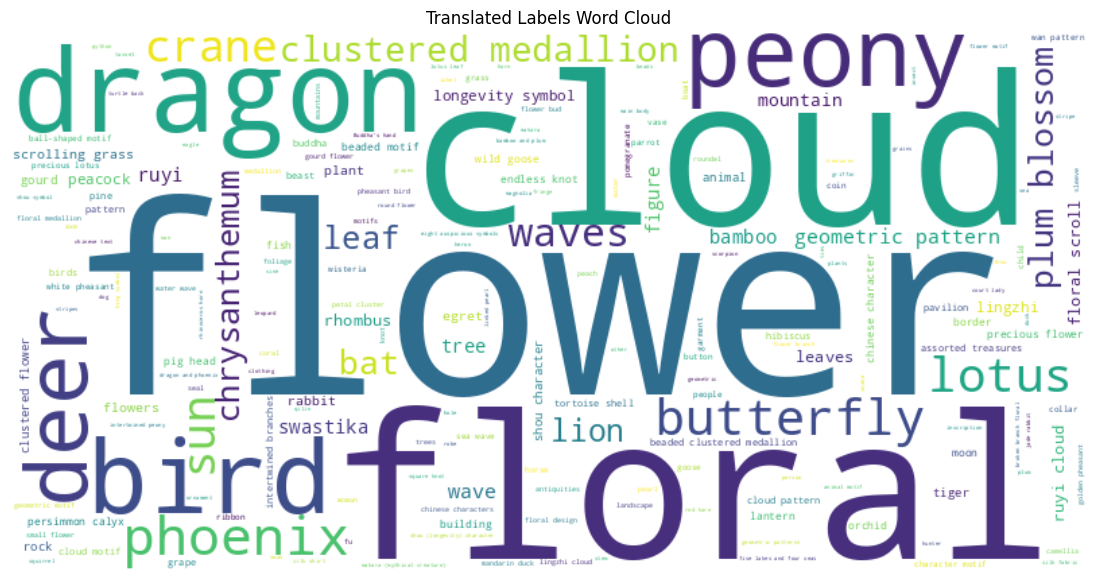

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Prepare a word frequency dictionary
word_freq = filtered_box_labels_df['translated_label'].value_counts().to_dict()

# generated word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Show word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Translated Labels Word Cloud')
plt.show()


In [22]:
print("Available columns.", boxes_df.columns)
filtered_box_labels_df

Available columns. Index(['liaojin', 'ming', 'qing', 'song', 'suitang', 'yuan', 'all'], dtype='object')


normalized_label translated_label
0              figure           figure
1       mountain tree    mountain tree
2                deer             deer
3                  ÁøüÈ∏ü    pheasant bird
4               plant            plant
...               ...              ...
2241             Êµ∑Ê∞¥Á∫πÊ†∑         sea wave
2242      flower tree      flower tree
2243        butterfly        butterfly
2244         swastika         swastika
2245      turtle back      turtle back

[2169 rows x 2 columns]

In [23]:
def translate_label(label):
    label_str = str(label).strip()
    if label_str in translation_map:
        return translation_map[label_str]
    for cn, en in sorted(translation_map.items(), key=lambda x: len(x[0]), reverse=True):
        if cn in label_str:
            return en
    return label_str

translated_boxes_df = boxes_df.copy()
translated_boxes_df.index = translated_boxes_df.index.map(translate_label)

# Load manually cleaned CSV as a filter
filtered_csv = pd.read_csv("unique_box_labels_cleaned.csv")
valid_labels = set(filtered_csv['label'])


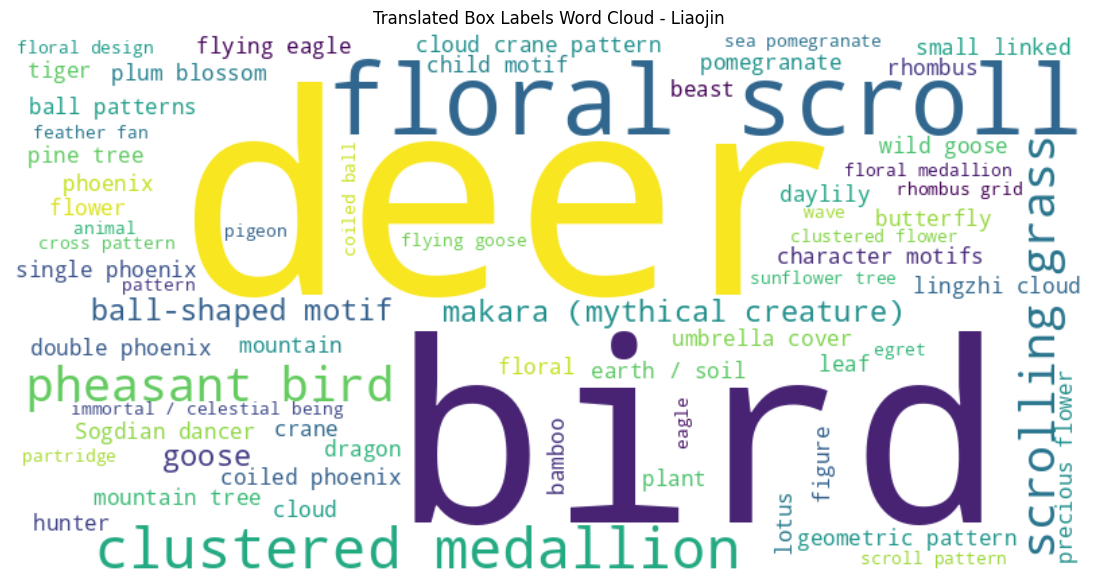

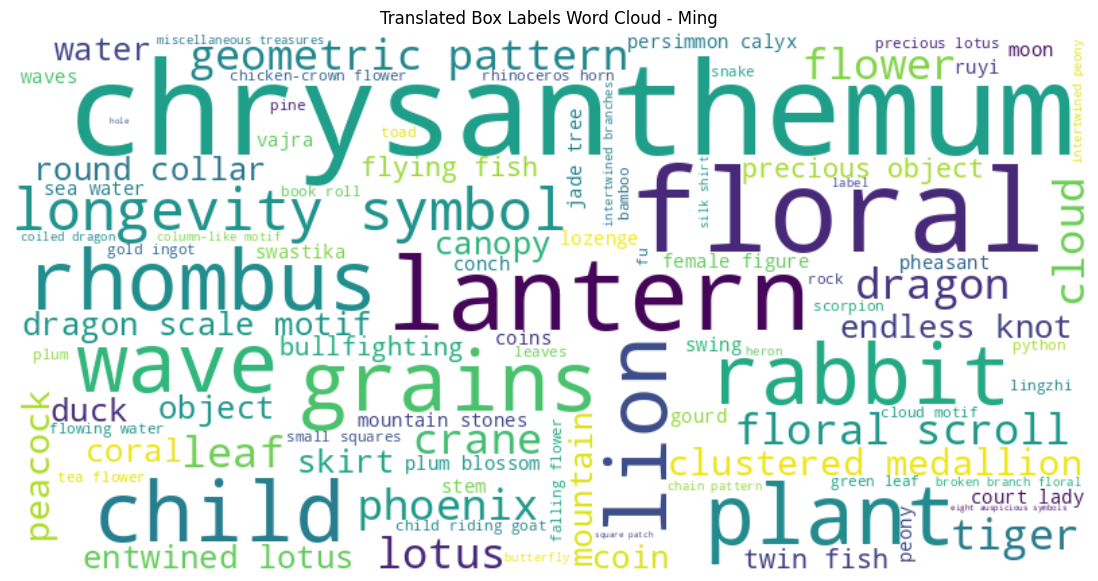

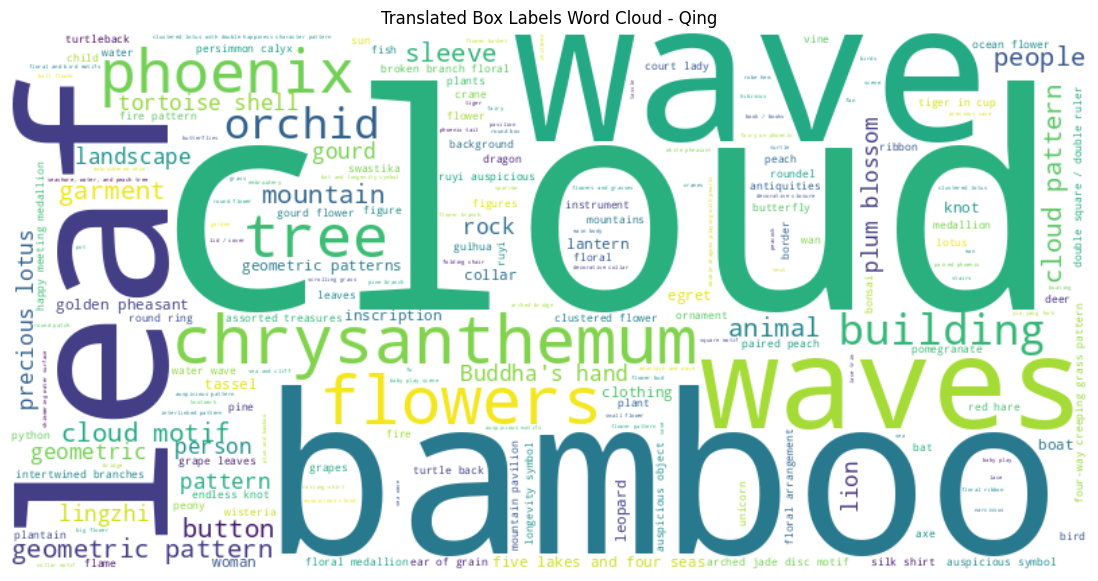

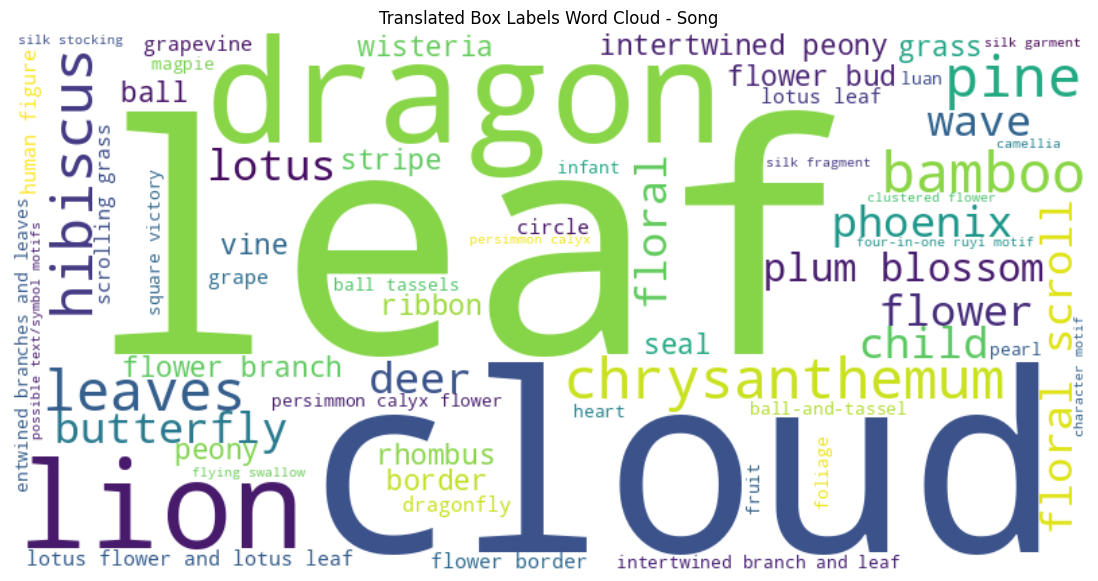

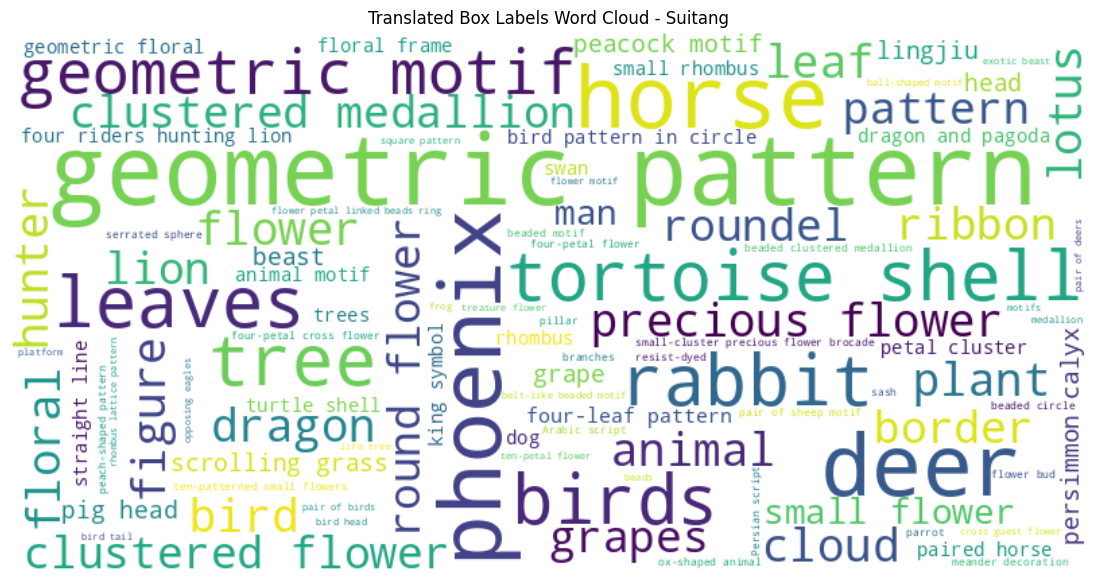

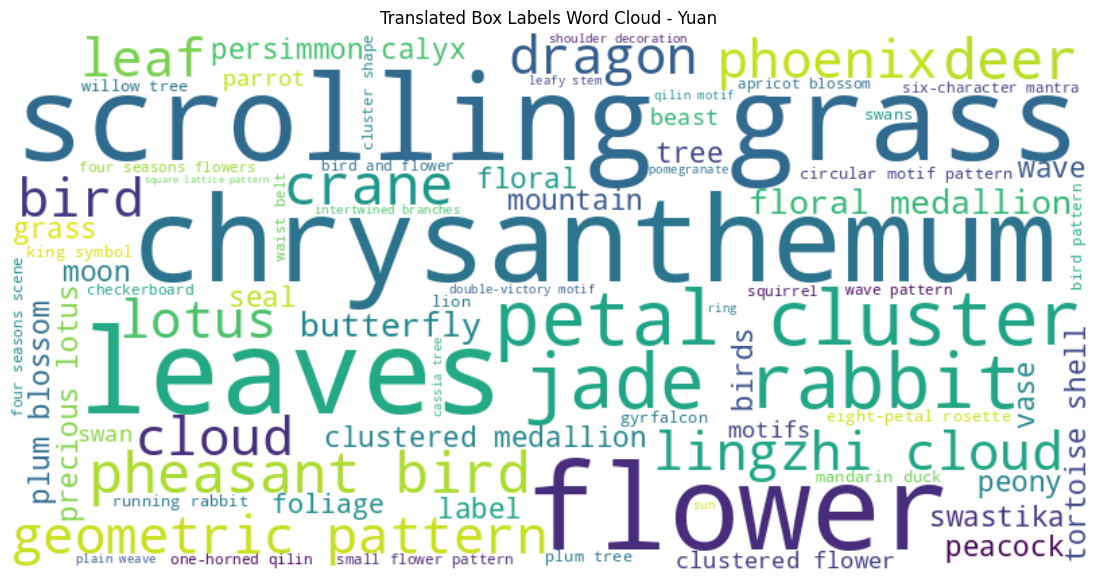

In [24]:
# Preserve labels present in CSV
translated_boxes_df = translated_boxes_df.loc[translated_boxes_df.index.isin(valid_labels)].copy()

# Remove the 'all' column and use only specific dynasties
dynasties = [col for col in translated_boxes_df.columns if col != 'all']

#Generate word clouds by each dynasty
for dynasty in dynasties:
    word_freq = translated_boxes_df[dynasty][translated_boxes_df[dynasty] > 0].to_dict()

    if word_freq:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Translated Box Labels Word Cloud - {dynasty.capitalize()}')
        plt.show()

# for dynasty in dynasties:
#     dynasty_labels = boxes_df[dynasty][boxes_df[dynasty] > 0].index.unique()
#     word_freq = {label: 1 for label in dynasty_labels}  

#     if word_freq:
#         wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

#         plt.figure(figsize=(15, 7))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis('off')
#         plt.title(f'Translated Box Labels Word Cloud - {dynasty.capitalize()}')
#         plt.show()

In [25]:
results = []

for dynasty in dynasties:
    word_freq = translated_boxes_df[dynasty][translated_boxes_df[dynasty] > 0].to_dict()

    if word_freq:
        # counts Âíå total
        counts = np.array(list(word_freq.values()))
        total = counts.sum()
        p = counts / total # Conversion ratio

        #Richness: number of non-zero categories
        richness = len(counts)

        # Entropy: -Œ£ p·µ¢ log(p·µ¢)
        entropy = -np.sum(p * np.log(p + 1e-12))  # Èò≤Ê≠¢ log(0)

        # Max entropy: log(richness)
        max_entropy = np.log(richness) if richness > 0 else 0

        #Evenness: actual entropy / maximum entropy
        evenness = entropy / max_entropy if max_entropy > 0 else 0

        results.append({
            'dynasty': dynasty,
            # 'richness': richness,
            'entropy': entropy,
            'evenness': evenness
        })


df_results = pd.DataFrame(results)
print(df_results)

   dynasty   entropy  evenness
0  liaojin  3.765542  0.898772
1     ming  4.479790  0.981474
2     qing  5.258190  0.964622
3     song  4.014447  0.965271
4  suitang  4.527861  0.985363
5     yuan  4.318627  0.994204


In [26]:
dynasties = [col for col in translated_boxes_df.columns if col != 'all']

for dynasty in dynasties:
    top20 = translated_boxes_df[dynasty].sort_values(ascending=False).head(20)
    labels = top20.index.tolist()
    print(f"\nüîπ {dynasty.capitalize()} Dynasty Top 20 Labels:")
    print(', '.join(labels))


üîπ Liaojin Dynasty Top 20 Labels:
deer, bird, flower, cloud, phoenix, wild goose, floral, clustered medallion, floral scroll, figure, crane, cloud, makara (mythical creature), scrolling grass, goose, pheasant bird, cloud, ball-shaped motif, precious flower, dragon

üîπ Ming Dynasty Top 20 Labels:
flower, cloud, lotus, dragon, chrysanthemum, peony, floral, crane, gourd, lantern, flower, cloud, child, cloud, swastika, rabbit, lion, grains, rhombus, longevity symbol

üîπ Qing Dynasty Top 20 Labels:
flower, butterfly, floral, dragon, bird, cloud, floral, sun, peony, cloud, bamboo, floral, bat, plum blossom, wave, leaf, waves, lotus, chrysanthemum, peony

üîπ Song Dynasty Top 20 Labels:
flower, leaf, cloud, dragon, lion, chrysanthemum, plum blossom, leaves, bamboo, pine, floral, peony, hibiscus, flower, character motif, possible text/symbol motifs, four-in-one ruyi motif, square victory, heart, ball tassels

üîπ Suitang Dynasty Top 20 Labels:
bird, flower, floral, lion, floral, clust

In [39]:
dynasties = [col for col in translated_boxes_df.columns if col != 'all']

for dynasty in dynasties:
    top20 = translated_boxes_df[dynasty].sort_values(ascending=False).head(20)
    labels = top20.index.tolist()
    print(f"\nüîπ {dynasty.capitalize()} Dynasty Top 20 Labels:")
    print(', '.join(labels))


üîπ Liaojin Dynasty Top 20 Labels with Counts:
deer: 15
bird: 12
flower: 8
cloud: 6
phoenix: 6
wild goose: 4
floral: 4
clustered medallion: 3
floral scroll: 3
figure: 3
crane: 2
makara (mythical creature): 2
cloud: 2
goose: 2
pheasant bird: 2
ball-shaped motif: 2
cloud: 2
precious flower: 2
dragon: 2
scrolling grass: 2

üîπ Ming Dynasty Top 20 Labels with Counts:
flower: 15
cloud: 12
lotus: 7
dragon: 7
chrysanthemum: 5
peony: 5
floral: 4
crane: 3
gourd: 3
lantern: 3
flower: 3
cloud: 2
child: 2
cloud: 2
rabbit: 2
swastika: 2
lion: 2
grains: 2
rhombus: 2
longevity symbol: 2

üîπ Qing Dynasty Top 20 Labels with Counts:
flower: 73
butterfly: 26
floral: 19
dragon: 14
bird: 13
cloud: 13
floral: 11
sun: 8
peony: 7
plum blossom: 6
bamboo: 6
cloud: 6
bat: 6
floral: 6
peony: 5
chrysanthemum: 5
waves: 5
flowers: 5
lotus: 5
leaf: 5

üîπ Song Dynasty Top 20 Labels with Counts:
flower: 21
leaf: 7
cloud: 4
dragon: 3
lion: 2
chrysanthemum: 2
plum blossom: 2
leaves: 2
pine: 2
bamboo: 2
floral: 2
p

2. Similarity heat map

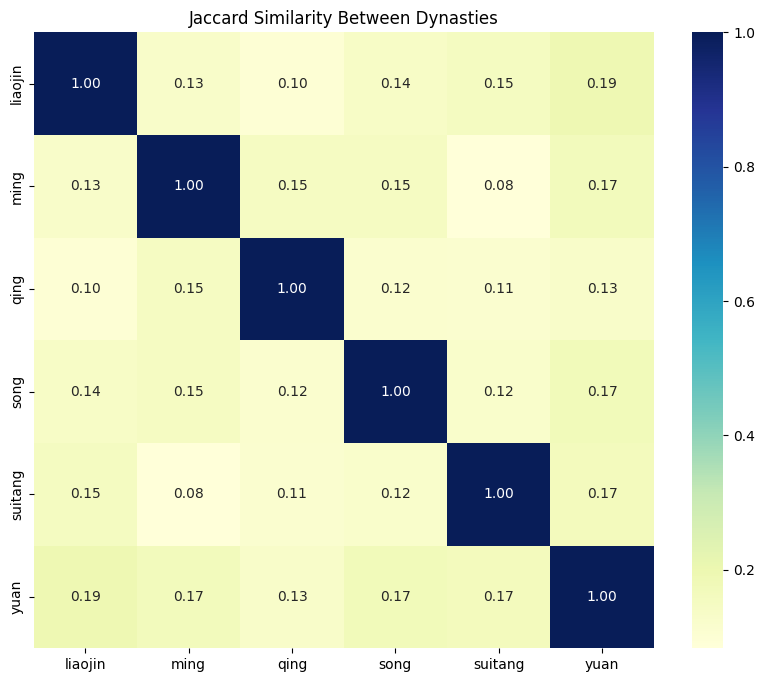

In [34]:
from itertools import combinations
from upsetplot import UpSet, from_memberships

dynasty_label_sets = {
    dynasty: set(translated_boxes_df.index[translated_boxes_df[dynasty] > 0])
    for dynasty in translated_boxes_df.columns if dynasty != 'all'
}

# Calculate the Jaccard similarity matrix
dynasties = list(dynasty_label_sets.keys())
jaccard_matrix = pd.DataFrame(0.0, index=dynasties, columns=dynasties)

for d1, d2 in combinations(dynasties, 2):
    set1, set2 = dynasty_label_sets[d1], dynasty_label_sets[d2]
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    jaccard = intersection / union if union != 0 else 0
    jaccard_matrix.loc[d1, d2] = jaccard
    jaccard_matrix.loc[d2, d1] = jaccard
np.fill_diagonal(jaccard_matrix.values, 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Jaccard Similarity Between Dynasties')
plt.show()


3. Top-N HF labelling UpSet plot code

/opt/anaconda3/envs/silk_env/lib/python3.10/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/opt/anaconda3/envs/silk_env/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fil


‚úÖ ÂÖ∑‰ΩìÊ†áÁ≠æÊ†áÊ≥®:
ÁªÑÂêà liaojin+ming+qing+song+suitang+yuan: flower, dragon, leaf, lotus
ÁªÑÂêà liaojin+qing+suitang+yuan: bird
ÁªÑÂêà liaojin+ming+qing: cloud, cloud
ÁªÑÂêà liaojin+ming+qing+suitang: floral, floral, floral
ÁªÑÂêà liaojin: butterfly, phoenix, plum blossom
ÁªÑÂêà liaojin+qing+song+suitang+yuan: deer
ÁªÑÂêà ming+qing: chrysanthemum, peony
ÁªÑÂêà ming+qing+song+suitang: lion
ÁªÑÂêà liaojin+ming+qing+yuan: crane
ÁªÑÂêà liaojin+ming+qing+suitang+yuan: geometric pattern
ÁªÑÂêà liaojin+ming+qing+song+yuan: wave


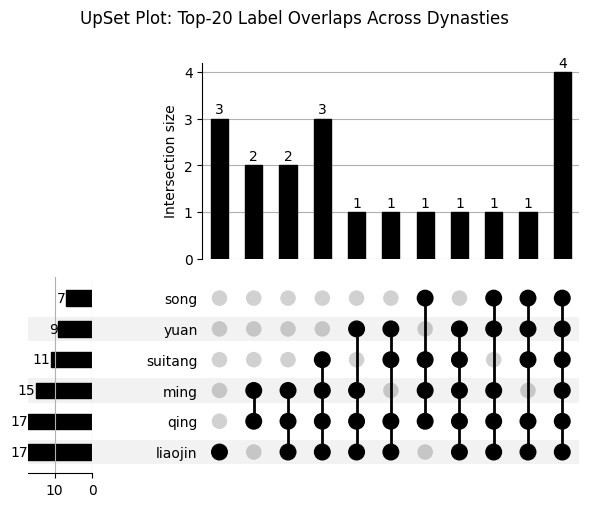

In [35]:
# Prepare Top-N labels
dynasties = [col for col in translated_boxes_df.columns if col != 'all']
N = 20
top_labels_series = translated_boxes_df[dynasties].sum(axis=1)
top_labels = top_labels_series.sort_values(ascending=False).head(N).index.tolist()

#Building membership lists and tag correspondences
memberships = []
label_map = {}
for label in top_labels:
    present_in = []
    for dyn in dynasties:
        try:
            value = translated_boxes_df.loc[label, dyn]
            if isinstance(value, pd.Series):
                value = value.iloc[0]
            if pd.notna(value) and np.isscalar(value) and float(value) > 0:
                present_in.append(dyn)
        except (KeyError, IndexError):
            continue
    if present_in:
        memberships.append(present_in)
        key = tuple(sorted(present_in))
        label_map.setdefault(key, []).append(label)

# Build upset data
if memberships:
    upset_data = from_memberships(memberships, data=[1] * len(memberships))

    fig = plt.figure(figsize=(12, 8))
    UpSet(upset_data, subset_size='count', show_counts=True).plot(fig=fig)
    plt.suptitle(f'UpSet Plot: Top-{N} Label Overlaps Across Dynasties')

    # Printed and labelled with specific labels
    print("\n‚úÖSpecific labelling.")
    for key, labels in label_map.items():
        combo = '+'.join(key)
        label_list = ', '.join(labels)
        print(f"ÁªÑÂêà {combo}: {label_list}")

    plt.show()
else:
    print("There is no label intersection data available for UpSet analysis.Please check top_labels and the frequency matrix„ÄÇ")


The meaning of `top20` here is:


From `translated_boxes_df`, the sum across dynasties is calculated for each tag.
Then the top 20 most frequent tags are selected in descending order of their total frequency of occurrence.


In other words, the Top-20 tags ‚âà the 20 most frequent and important motifs on a global (cross-dynasty) scale.


These tags are then used to analyse their distribution and intersection across dynasties, the
Namely:
- Which labels are found in more than one dynasty?
- Which labels appear only in individual dynasties?

But since the number varies from dynasty to dynasty, it's worth discussing whether this is informative or not

/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_6245/710101740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='label', palette='viridis')


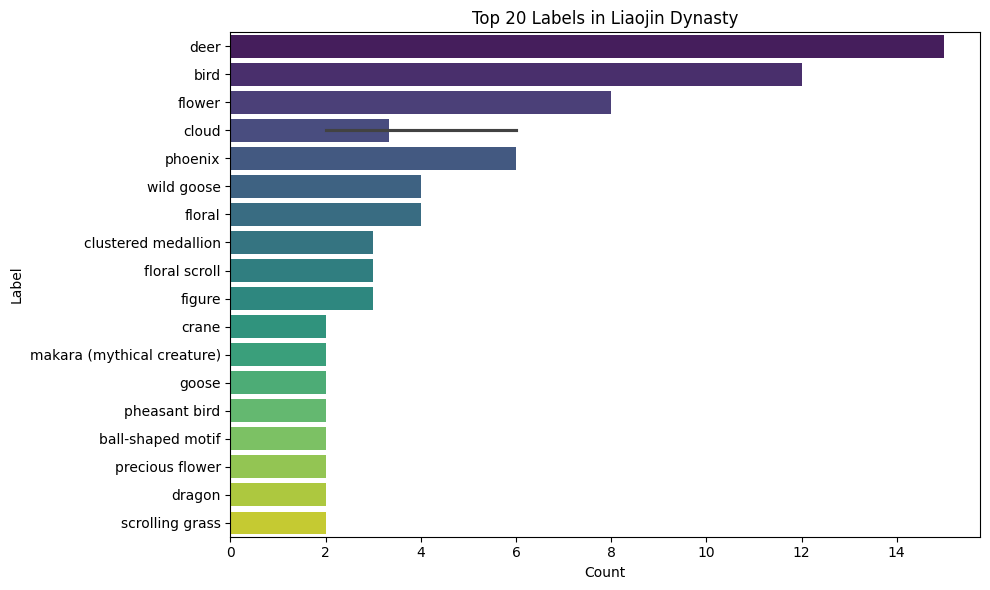

/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_6245/710101740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='label', palette='viridis')


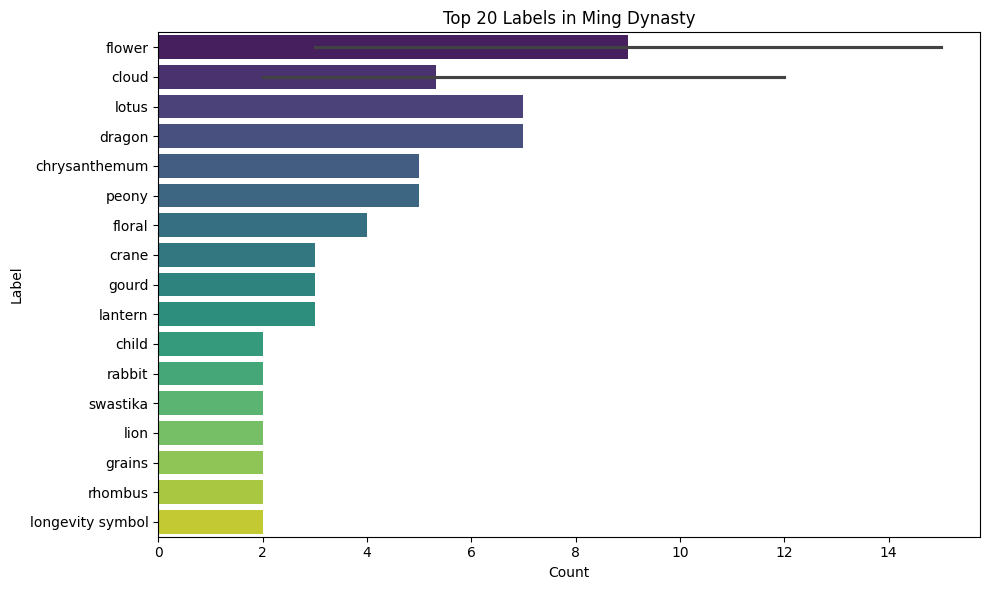

/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_6245/710101740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='label', palette='viridis')


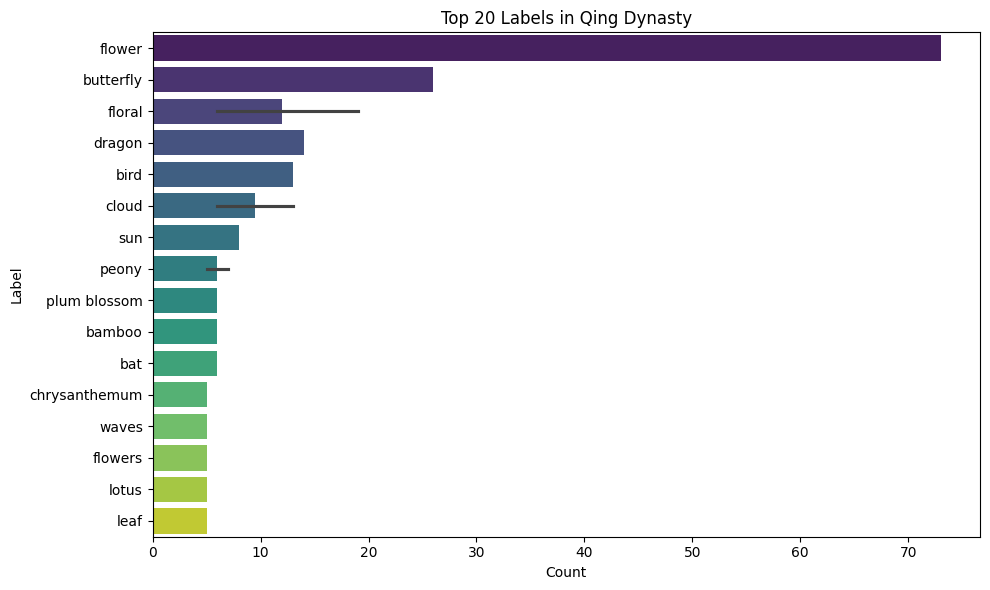

/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_6245/710101740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='label', palette='viridis')


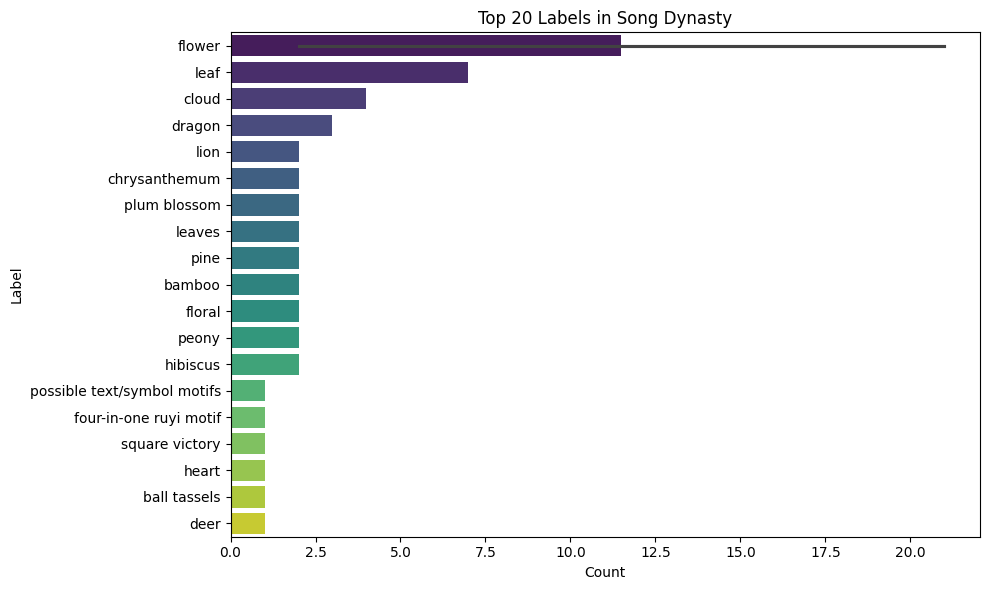

/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_6245/710101740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='label', palette='viridis')


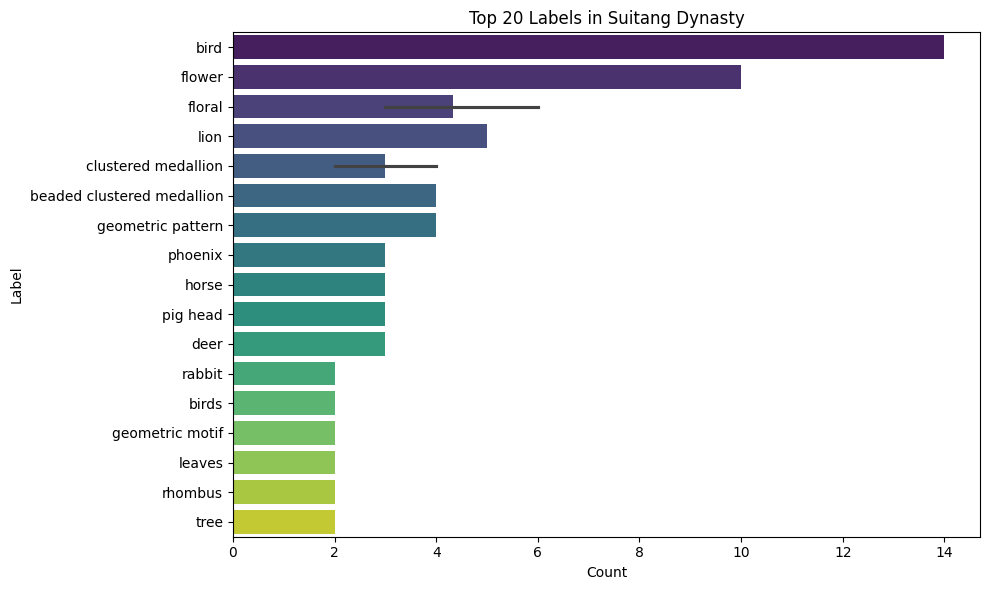

/var/folders/mf/3rb2ryr570v816gw_89qbt1c0000gn/T/ipykernel_6245/710101740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='count', y='label', palette='viridis')


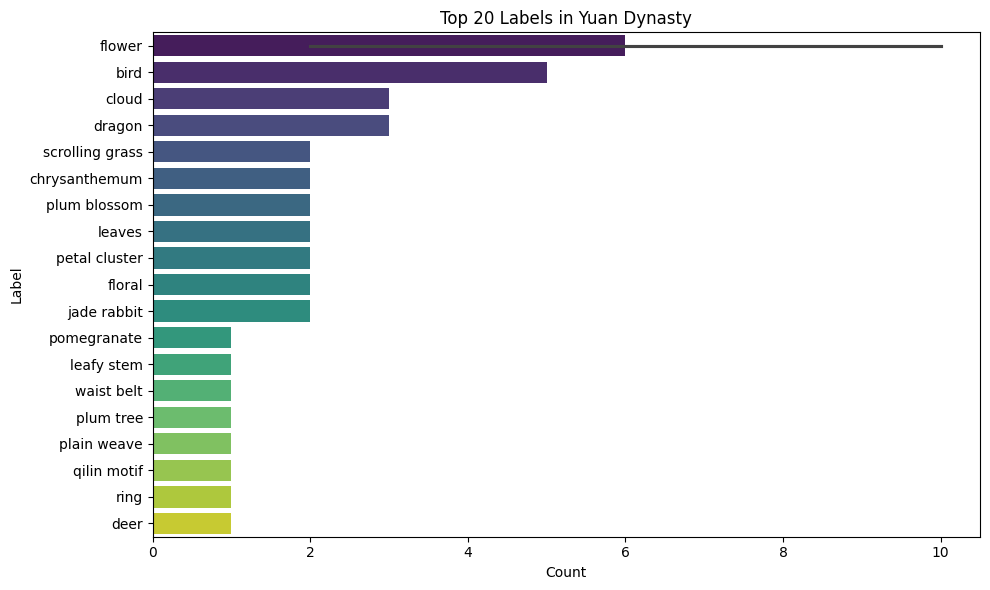

In [36]:
dynasties = [col for col in translated_boxes_df.columns if col != 'all']

for dynasty in dynasties:
    top20 = translated_boxes_df[dynasty].sort_values(ascending=False).head(20)
    df_plot = pd.DataFrame({'label': top20.index, 'count': top20.values})
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_plot, x='count', y='label', palette='viridis')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.title(f'Top 20 Labels in {dynasty.capitalize()} Dynasty')
    plt.tight_layout()
    plt.show()